In [1]:
import numpy as np
import math

In [2]:
def get_k_effective_from_file(file_name):
    count = 0
    lines = []
    with open(file_name) as fp:
        for line in fp:
            count += 1
            lines.append(line)

    line_array = []
    for line in lines:
        line_array.append(line.split())
        
    k_effective_sample  = []

    for line in line_array:
        k_effective_sample.append(float(line[3]))
    
    return k_effective_sample

In [3]:
def merge_k_effective_files(files):
    
    merged_k_effective = []
    for file in files:
        k_effective_values = get_k_effective_from_file(file)
        merged_k_effective.extend(k_effective_values)
        
    return merged_k_effective

In [4]:
def compute_k_effective_mean(k_effective):
    
    mean_k_effective = []
    for i in range(1, len(k_effective)):
        mean_k_effective.append(sum(k_effective[:i]) / i)
    return mean_k_effective

In [5]:
def compute_std(iterations_skip, k_effective):
    
    sample_std = []
    for i in range(iterations_skip, len(k_effective)):
        sample_std.append(np.std(k_effective[:i])/ np.sqrt(i - 1))
        
    return sample_std

In [6]:
def another_way_to_compute_std(iterations_skip, k_effective):
    
    average = sum(k_effective) / len(k_effective)
    sum_average = 0.
    
    for i in range(0, len(k_effective)):
        sum_average += (k_effective[i] - average) * (k_effective[i] - average)
    
    sum_average = np.sqrt(sum_average / (len(k_effective) * (len(k_effective) - 1)))
    return sum_average
        
    

In [7]:
def get_mean_std_by_sample(files):
    
    iterations_skip = 2
    k_effective = merge_k_effective_files(files)
    
    k_effective_mean = compute_k_effective_mean(k_effective)
    sample_std = compute_std(iterations_skip, k_effective)
    std_another_way = another_way_to_compute_std(iterations_skip, k_effective)
    
    print("number iterations "+ str(len(k_effective)))
    print("k effective  " + str(k_effective_mean[-1]))
    print(" std [pcm]  "+ str(sample_std[-1] * 100000))
    print(" std 2 [pcm]  "+ str(std_another_way * 100000))
    
    return k_effective_mean[-1], sample_std[-1], std_another_way

In [29]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/reactor_flux_3/"
file_name_zero = "/result_flux0.txt"
file_name_1 = "/result_flux1.txt"
file_name_2 = "/result_flux2.txt"
file_name_3 = "/result_flux3.txt"
file_name_4 = "/result_flux4.txt"


names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]


In [9]:
def get_file_names(sub_path, output_file_name, idx_start, idx_end):
    
    result_names = []
    
    for i in range(idx_start, idx_end):
        if i != 4:
            current_name = sub_path + str(i) + output_file_name
            result_names.append(current_name)
        
    return result_names

In [20]:
names_measurings = get_file_names(sub_path, file_name_zero, 2, 41)

In [30]:
print(names_measurings)

['/result_flux0.txt', '/result_flux1.txt', '/result_flux2.txt', '/result_flux3.txt', '/result_flux4.txt']


In [31]:
def get_flux_from_file(file_name):
    count = 0
    lines = []
    with open(file_name) as fp:
        for line in fp:
            count += 1
            lines.append(line)

    line_array = []
    for line in lines:
        line_array.append(line.split())
        
    flux_sample  = []
    for line in line_array:
        flux_sample.append(float(line[1]))
    
    return flux_sample

In [32]:
def get_flux_value(sub_path, file_name, idx_start, idx_end):
    
    merged_flux = []
    for i in range(idx_start, idx_end):
        if i == 11:
            continue
        
        if i == 31:
            continue
        result_name = sub_path + str(i) + file_name
        
        current_flux = get_flux_from_file(result_name)
        current_flux = current_flux[10: len(current_flux) - 1]
        merged_flux.extend(current_flux)
        
    return merged_flux
        

In [33]:
zero_point = get_flux_value(sub_path, file_name_zero, 2, 41)
zero_point = sum(zero_point) / len(zero_point)

In [34]:
print(zero_point)

435.85245174598003


In [35]:
def get_std(values):
    
    current_std = np.std(values)/np.sqrt((len(values) - 1.))
  
    return current_std   

In [43]:
def get_fluxes(sub_path, file_names, idx_start, idx_end, zero_point):

    result_fluxes = []
    result_std = []
    for name in file_names:
        result_flux = get_flux_value(sub_path, name, idx_start, idx_end)
        normalise_flux = np.array(result_flux)
        current_std = get_std(normalise_flux)
        result_fluxes.append(sum(normalise_flux)/len(normalise_flux))
        
    return result_fluxes, result_std   
    

In [44]:
result_fluxes, result_std = get_fluxes(sub_path, names_measurings, 2, 41, zero_point)

In [45]:
print(result_fluxes)

[435.85245174598003, 528.5239167793286, 128.55914202952954, 227.49682896268308, 1257.142280898431]


In [61]:


zero_estimator = result_fluxes[0]

average_value = result_fluxes[0]
zero_point = average_value / (0.317337461 * 0.1)


In [62]:
average_value = result_fluxes[1]
average_value = average_value / ( zero_point * 0.317337461 * 0.1)

In [63]:
print(average_value)

1.2126211855918587


In [64]:
difference = (average_value - 1.229538) * 100000
print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " )


 difference from beachmark [pcm]  -1691.6814408141302  with standart deviation [pcm]+- 


In [65]:
average_value = result_fluxes[2]
average_value = average_value / (zero_point * 2. * 0.317337461 * 0.01)


difference = (average_value - 1.49712) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " )


 difference from beachmark [pcm]  -2231.881998443641  with standart deviation [pcm]+- 


In [59]:
U_Fe_estimator = result_fluxes[3]
average_value = U_Fe_estimator
average_value = average_value / (zero_point * (5.754395005 - 5.437057544)  * 0.04)
difference = (average_value - 1.324899) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- ")



 difference from beachmark [pcm]  -2000.311120005116  with standart deviation [pcm]+- 


In [60]:

average_value = result_fluxes[4]
average_value = average_value / ( zero_point * (7.757166007 -5.754395005) * 0.05)


difference = (average_value - 0.912273) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- ")


 difference from beachmark [pcm]  176.65407195003314  with standart deviation [pcm]+- 


In [39]:
test_fluxes = [1.229538, 1.49712, 1.324899, 0.912273]

In [34]:
result_fluxes[-1] = result_fluxes[-1] / 0.05

In [35]:
flux_slub = [1., 0.9701734, 0.8810540, 0.7318131, 0.4902592]



for i in range(0, len(flux_slub)):
    print(str(((flux_slub[i] - result_fluxes[i])/flux_slub[i])* 100) + " %  " + str(result_std[i] * 100000))

8.215650382226158e-13 %  7.165661013789383
-0.0017813816386396712 %  7.115929063236195
0.008439326852241864 %  6.755419137044152
0.07938633563562243 %  6.186733449234411
-1.8665821129406668 %  0.9982374526811431


In [13]:
import numpy as np

from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

import matplotlib.pyplot as plt


flux_points = [0., 0.25, 0.5, 0.75, 1.]

flux_values = [1., 0.9701734, 0.8810540, 0.7318131, 0.4902592]


In [14]:
def calculate_int_values(points, flux_values, epsilon, border, radius):
    
    ius = InterpolatedUnivariateSpline(flux_points, flux_values)
    result_ints = []
    for i in range(1, len(points) - 1):
        first_point = points[i]  - epsilon / radius
        secound_point = points[i]  + epsilon / radius
        range_sum = ius.integral(first_point, secound_point)
        result_ints.append(range_sum)
        
    border_sum = ius.integral(1. - border / radius, 1.)
    result_ints.append(border_sum)
    
    return result_ints
        

In [15]:
epsilon = 0.2
radius = 2.256751
border = 0.02

In [16]:
int_sum = calculate_int_values(flux_points, flux_values, epsilon, border, radius)

In [17]:
print(int_sum)

print(result_fluxes)

[0.17173920674972554, 0.1559614448121684, 0.1293682268858979, 0.004391867996426392]


NameError: name 'result_fluxes' is not defined

In [223]:
def multiply_flux_on_range(input_flux, epsilon, border, radius):
    
    normalised_flux = []
    for i in range(0, len(input_flux) - 1):
        result_flux = input_flux[i] * ( 2. * epsilon / radius)       
        normalised_flux.append(result_flux)
    
    result_flux = input_flux[len(input_flux)] * ( border /radius) 
    normalised_flux.append(result_flux)
    
    return normalised_flux
    

In [36]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/slab_measurings_10/"
file_name_zero = "/result_flux0.txt"
file_name_1 = "/result_flux1.txt"
file_name_2 = "/result_flux2.txt"
file_name_3 = "/result_flux3.txt"
file_name_4 = "/result_flux4.txt"

names_measurings = [file_name_zero, file_name_1,  file_name_2, file_name_3, file_name_4]

In [37]:
normalized_flux = multiply_flux_on_range(result_fluxes[1:], epsilon, border, radius)

IndexError: list index out of range

In [48]:
print(normalized_flux)

[0.17196237998623876, 0.15615008389905582, 0.12960794352521987, 0.004425922846909083]


In [49]:
print(int_sum)

[0.17173920674972554, 0.1559614448121684, 0.1293682268858979, 0.004391867996426392]


In [50]:
for i in range(0, len(normalized_flux)):
    relative_difference = ((int_sum[i] - normalized_flux[i])/ int_sum[i]) * 100
    
    print("i === " + str(i) + str("  ") + str(relative_difference))

i === 0  -0.12994891541478226
i === 1  -0.1209523848119123
i === 2  -0.18529792445357252
i === 3  -0.7754069682968978


In [75]:
print(flux_slub)

[0.9701734, 1.0, 0.9701734, 0.881054, 0.7318131, 0.4902592]


In [76]:
flux_slub = [0.9701734, 1.0, 0.9701734, 0.881054, 0.7318131, 0.4902592]

In [77]:
flux_points = [0, 0.25, 0.5, 0.75, 1]

In [78]:
flux_points_1 = [-0.25, 0, 0.25, 0.5, 0.75, 1]

In [79]:
import matplotlib.pyplot as plt

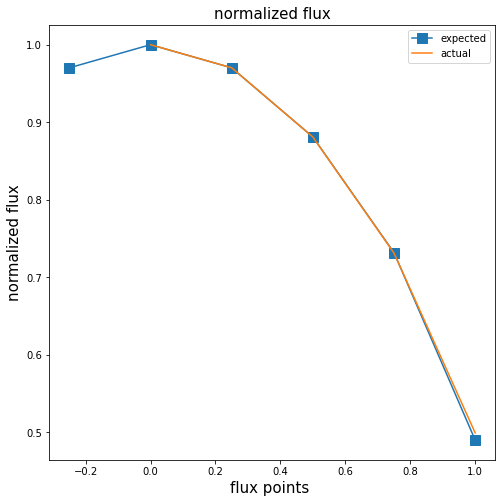

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("normalized flux", fontsize = 15)
plt.xlabel("flux points ", fontsize = 15)
plt.ylabel("normalized flux", fontsize = 15)


plt.plot(flux_points_1, flux_slub, marker = 's', markersize=10, label="expected")
plt.plot(flux_points, result_fluxes, label="actual")
plt.legend()

In [19]:
def divide_estimators_square(average_number_of_collision, radius, epsilon):
    average_number_of_collision[0] /= np.pi * epsilon * epsilon
    
    average_number_of_collision[1] /= np.pi * ((radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) -
                                            (radius * 0.5 - epsilon) * (radius * 0.5 - epsilon))
    
    average_number_of_collision[2] /= np.pi * ((radius) * (radius) -
                                            (radius - 0.05) * (radius - 0.05))
    
    
    
    result_estimators = [ average_number_of_collision[1]/
                         average_number_of_collision[0], average_number_of_collision[2]/ average_number_of_collision[0]]
    
    return result_estimators, average_number_of_collision[0]

In [20]:
def get_fluxes_cylinder(sub_path, file_names, idx_start, idx_end, radius, epsilon, border):
    print(" sub_path "+ str(sub_path))
    
    result_fluxes = []
    result_std = []
    i = 0
    zero_value = 0.
    for name in file_names:
        result_flux = get_flux_value(sub_path, name, idx_start, idx_end)
        normalise_flux = np.array(result_flux)
        if i == 0:
            normalise_flux = normalise_flux / (np.pi * epsilon * epsilon)
            zero_value = normalise_flux
            
        if i == 1:
            normalise_flux = normalise_flux / (np.pi * ((radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) -
                                            (radius * 0.5 - epsilon) * (radius * 0.5 - epsilon)))
            normalise_flux = normalise_flux / zero_value
            
        if i == 2:
            normalise_flux = normalise_flux / (np.pi * ((radius) * (radius) -
                                            (radius - border) * (radius - border)))
            normalise_flux = normalise_flux / zero_value
        i = i + 1
                
            
            
        current_std = get_std(normalise_flux)
        print("current std  "+ str(current_std * 100000) )
        result_std.append(current_std)
        result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
        
    return result_fluxes, result_std   

In [224]:
sub_path = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_more_calculation/0.05/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"
file_name_2 = "/result_flux.txt2.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2]

In [225]:
radius = 4.279960
epsilon = 0.05
border = 0.05

In [226]:
zero_point = get_flux_value(sub_path, file_name_zero, 1, 31)
zero_point = sum(zero_point) / len(zero_point)

In [227]:
result_fluxes, result_std = get_fluxes_cylinder(sub_path, names_measurings, 1, 31, radius, epsilon, border)

 sub_path /home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_more_calculation/0.05/
current std  11.425934312198553
current std  83.15064851839645
current std  31.372307892356897


In [228]:
result_fluxes = result_fluxes[1:]

In [229]:
print(result_fluxes)

[0.8211745527074473, 0.3088037159516564]


In [230]:
test_flux = [0.8093, 0.2926]

In [231]:




# In[312]:


for i in range(0, len(test_flux)):
    print(str(((result_fluxes[i] - test_flux[i])/test_flux[i]* 100)))

1.4672621657540228
5.537838671106074


In [232]:
flux_points = [0., 0.5, 1.]

In [238]:
print(result_fluxes)

[0.8211745527074473, 0.3088037159516564]


In [233]:
test_flux = [1, 0.8093, 0.2926]
print(flux_points)
print(test_flux)

[0.0, 0.5, 1.0]
[1, 0.8093, 0.2926]


In [234]:
from scipy.interpolate import interp1d

import scipy.integrate as integrate

In [235]:
print(flux_points)
print(test_flux)
ius = interp1d(flux_points, test_flux)
result_ints = []
for i in range(1, len(flux_points) - 1):
    first_point = flux_points[i]  - epsilon / radius
    secound_point = flux_points[i]  + epsilon / radius
    result = integrate.quad(ius, first_point, secound_point)
    result_ints.append(result)

border_sum = integrate.quad(ius, 1. - border / radius, 1.)
result_ints.append(border_sum)

[0.0, 0.5, 1.0]
[1, 0.8093, 0.2926]


In [220]:
print(result_ints)

[(0.01886456360797864, 2.0944075466988732e-16), (0.003488774093297849, 3.873317326095026e-17)]


In [236]:
int_flux = [0.01886456360797864, 0.003488774093297849]

In [239]:
first = result_fluxes[0] * ( 2. * epsilon / radius)
secound = result_fluxes[1] * ( border /radius)


In [241]:
result = [first, secound]
print(result)

[0.019186500638030436, 0.0036075537616199267]


In [242]:
(int_flux[0] - first)/int_flux[0]

-0.017065702485459806

In [243]:
(int_flux[1] - secound)/int_flux[1]

-0.03404624809335197

In [46]:
sub_path = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/new_measurings_sphere_new/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"
file_name_2 = "/result_flux.txt2.txt"
file_name_3 = "/result_flux.txt3.txt"
file_name_4 = "/result_flux.txt4.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]

In [47]:
zero_point = get_flux_value(sub_path, file_name_zero, 10, 41)
zero_point = sum(zero_point) / len(zero_point)

In [48]:
print(zero_point)

3.940555127709216e-05


In [49]:
def get_fluxes_sphere(sub_path, file_names, idx_start, idx_end, radius, zenter, epsilon, border):
    
    result_fluxes = []
    result_std = []
    i = 0
    zero_value = 0.

    result_flux = get_flux_value(sub_path, file_names[0], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * zenter * zenter * zenter)
    zero_value = sum(normalise_flux)/ len(normalise_flux)
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    result_flux = get_flux_value(sub_path, file_names[1], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius * 0.25 + epsilon) * (radius * 0.25 + epsilon) * (radius * 0.25 + epsilon) -
                                (radius * 0.25 - epsilon) * (radius * 0.25 - epsilon)* (radius * 0.25 - epsilon)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    result_flux = get_flux_value(sub_path, file_names[2], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) -
                                (radius * 0.5 - epsilon) * (radius * 0.5 - epsilon)* (radius * 0.5 - epsilon)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    result_flux = get_flux_value(sub_path, file_names[3], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius * 0.75 + epsilon) * (radius * 0.75 + epsilon) * (radius * 0.75 + epsilon) -
                                (radius * 0.75 - epsilon) * (radius * 0.75 - epsilon)* (radius * 0.75 - epsilon)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    result_flux = get_flux_value(sub_path, file_names[4], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius) * (radius) * (radius) -
                                            (radius - border) * (radius - border) * (radius - border)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    
    return result_fluxes, result_std   

In [50]:
result_fluxes, result_std = get_fluxes_sphere(sub_path, names_measurings, 10, 41, 6.082547, 0.1, 0.05, 0.05)

In [51]:
print(result_std)

[4.6629546245777706e-05, 0.00019127082525815424, 8.687724442303425e-05, 4.554091135084795e-05, 3.0248783240048362e-05]


In [52]:
print(result_fluxes)

[0.009407382406515567, 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]


In [124]:
0.2009 - 0.19222603

0.008673970000000003

In [53]:
test_flux = [0.93538006, 0.75575352, 0.49884364, 0.19222603]

for i in range(0, len(test_flux)):
    print(str(((test_flux[i] - result_fluxes[i + 1])/test_flux[i] )* 100) + " % " + str(result_std[i + 1] * 100000))

-0.3861798532460907 % 19.127082525815425
-0.3891818690508088 % 8.687724442303425
-0.3886891134063042 % 4.5540911350847955
-4.554961422526799 % 3.024878324004836


In [54]:
import numpy as np

from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

import matplotlib.pyplot as plt

In [55]:
def calculate_int_values(input_points, flux_values, epsilon, border, radius):
    
    print(input_points)
    print(flux_values)
    ius = InterpolatedUnivariateSpline(input_points, flux_values)
    result_ints = []
    for i in range(1, len(input_points) - 1):
        
        first_point = input_points[i]  - epsilon / radius
        secound_point = input_points[i]  + epsilon / radius
        
        print(first_point)
        print(secound_point)

        range_sum = ius.integral(first_point, secound_point)
        result_ints.append(range_sum)
        
    border_sum = ius.integral(1. - border / radius, 1.)
    result_ints.append(border_sum)
    
    return result_ints

In [56]:
flux_points = [0, 0.25, 0.5, 0.75, 1]
epsilon = 0.05
border = 0.05
radius = 6.082547

In [57]:
print(flux_points)

[0, 0.25, 0.5, 0.75, 1]


In [58]:
result_fluxes = [1., 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]

In [59]:
int_sum = calculate_int_values(flux_points, result_fluxes, epsilon, border, radius)

[0, 0.25, 0.5, 0.75, 1]
[1.0, 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]
0.2417797593672519
0.25822024063274807
0.49177975936725193
0.5082202406327481
0.7417797593672519
0.7582202406327481


In [60]:
print(int_sum)

[0.015437132078952177, 0.012473081612833123, 0.008232982711015333, 0.0016939120286756032]


In [61]:
print(result_fluxes)

[1.0, 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]


In [62]:
result_fluxes = result_fluxes[1:]

In [63]:
print(result_fluxes)

[0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]


In [64]:
normalized_flux = multiply_flux_on_range(result_fluxes, epsilon, border, radius)

In [65]:
print(normalized_flux)

[0.015437485470198608, 0.012473307245707322, 0.0082331068041332, 0.0016521191822320058]


In [66]:
for i in range(0, len(test_flux)):
    print(str(((normalized_flux[i] - int_sum[i])/int_sum[i] )* 100) + " % " )

0.0022892286250030263 % 
0.0018089585332834873 % 
0.0015072680488016745 % 
-2.4672383061281784 % 


In [72]:
flux_points_1 = [-0.25, 0, 0.25, 0.5, 0.75, 1]

test_flux = [0.93538006, 1., 0.93538006, 0.75575352, 0.49884364, 0.19222603]

result_fluxes = [1., 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]

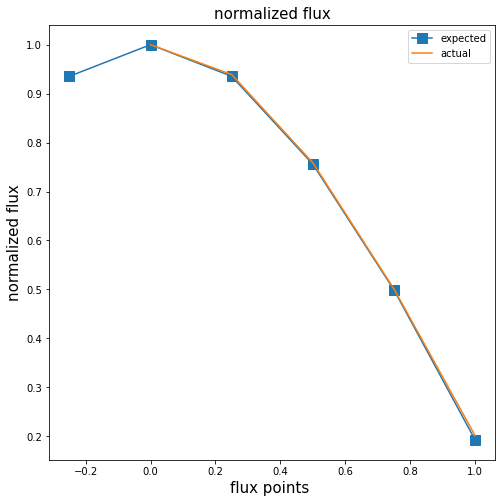

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("normalized flux", fontsize = 15)
plt.xlabel("flux points ", fontsize = 15)
plt.ylabel("normalized flux", fontsize = 15)


plt.plot(flux_points_1, test_flux, marker = 's', markersize=10, label="expected")
plt.plot(flux_points, result_fluxes, label="actual")
plt.legend()

In [55]:
def get_fluxes(sub_path, file_names, idx_start, idx_end, zero_point):
    print(" sub_path "+ str(sub_path))
    print( file_names)
    
    result_fluxes = []
    result_std = []
    for name in file_names:
        result_flux = get_flux_value(sub_path, name, idx_start, idx_end)
        normalise_flux = np.array(result_flux) / zero_point
        current_std = get_std(normalise_flux)
        print(current_std)
        print("current std  "+ str(current_std * 100000) )
        result_std.append(current_std)
        result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
        
    return result_fluxes, result_std   
    

In [66]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/slab_measurings_10/"
file_name_zero = "/result_flux0.txt"
file_name_1 = "/result_flux1.txt"
file_name_2 = "/result_flux2.txt"
file_name_3 = "/result_flux3.txt"
file_name_4 = "/result_flux4.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]

In [71]:
zero_point = get_flux_value(sub_path, file_name_zero, 2, 30)
zero_point = sum(zero_point) / (len(zero_point) * (0.1/0.05))

In [72]:
print(zero_point)

0.11385102739668114


In [73]:
result_fluxes, result_std = get_fluxes(sub_path, names_measurings, 2, 30, zero_point)

 sub_path /home/xeinia/Documents/bastra74/MG_measurings_b1/slab_measurings_10/
['/result_flux0.txt', '/result_flux1.txt', '/result_flux2.txt', '/result_flux3.txt', '/result_flux4.txt']
0.0001363978198977086
current std  13.63978198977086
9.103733429321933e-05
current std  9.103733429321933
8.742574581102969e-05
current std  8.742574581102968
7.968549163095741e-05
current std  7.968549163095742
2.832553216607257e-05
current std  2.832553216607257


In [61]:
flux_values = [0.9701734, 0.8810540, 0.7318131, 0.4902592]

In [79]:
print(result_fluxes)

[0.9703260072533928, 0.8813611232674651, 0.7320519413989385, 0.4988382661977512]


In [77]:
result_fluxes = [0.9703260072533928, 0.8813611232674651, 0.7320519413989385, 0.09976765323955022]

In [78]:
result_fluxes[-1] = result_fluxes[-1] /(0.02/0.05) *2.

In [81]:
for i in range(0, len(flux_values)):
    print(str(((flux_values[i] - result_fluxes[i])/flux_values[i] )* 100) + " % " + str(result_std[i ] * 100000))

-0.01572989461397659 % 13.63978198977086
-0.034858620182766364 % 9.103733429321933
-0.032636939532577784 % 8.742574581102968
-1.7499041726807316 % 7.968549163095742


In [94]:
import numpy as np

from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

import matplotlib.pyplot as plt


flux_points = [0., 0.25, 0.5, 0.75, 1.]

flux_values = [1., 0.9701734, 0.8810540, 0.7318131, 0.4902592]

In [95]:
def calculate_int_values(points, flux_values, epsilon, border, radius):
    
    ius = InterpolatedUnivariateSpline(flux_points, flux_values)
    result_ints = []
    for i in range(1, len(points) - 1):
        first_point = points[i]  - epsilon / radius
        secound_point = points[i]  + epsilon / radius
        range_sum = ius.integral(first_point, secound_point)
        result_ints.append(range_sum)
        
    border_sum = ius.integral(1. - border / radius, 1.)
    result_ints.append(border_sum)
    
    return result_ints
        

In [108]:
epsilon = 0.05
radius = 2.256751
border = 0.02

In [109]:
int_sum = calculate_int_values(flux_points, flux_values, epsilon, border, radius)

In [110]:
print(int_sum)


[0.04298638996512332, 0.03903775303346637, 0.03242237454553718, 0.004391867996426392]


In [105]:
def multiply_flux_on_range(input_flux, epsilon, border, radius):
    
    normalised_flux = []
    for i in range(0, len(input_flux) - 1):
        result_flux = input_flux[i] * ( 2. * epsilon / radius)       
        normalised_flux.append(result_flux)
    
    result_flux = input_flux[3] * ( border /radius) 
    normalised_flux.append(result_flux)
    
    return normalised_flux

In [106]:
normalized_flux = multiply_flux_on_range(result_fluxes, epsilon, border, radius)

In [107]:
print(normalized_flux)

[0.04299659143846144, 0.03905442484649238, 0.03243831248546865, 0.004420853396743825]


In [112]:
for i in range(0, len(normalized_flux)):
    print(str(((normalized_flux[i] - int_sum[i])/int_sum[i]* 100)))

0.023731868031711748
0.0427068971201237
0.04915722600478188
0.6599788595881838


In [129]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_flux_3/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"

names_measurings = [file_name_zero, file_name_1]

In [133]:
def get_collision_sum(sub_path, file_names, idx_start, idx_end, zero_point):

    result_fluxes = []
    result_std = []
    for name in file_names:
        result_flux = get_flux_value(sub_path, name, idx_start, idx_end)      
        result_fluxes.append(result_flux)
        
    return result_fluxes

In [134]:
collision_sum = get_collision_sum(sub_path, names_measurings, 1, 60, zero_point)

In [135]:
first_group_flux = []
secound_group_flux = []

number_particles = 1000
cs_total_pu_239 = [0.3360, 0.2208]

for i in range(0, len(collision_sum[0]) - 1):
    first_group_flux.append(collision_sum[0][i]/(cs_total_pu_239[0]))

for i in range(0, len(collision_sum[1]) - 1):
    secound_group_flux.append(collision_sum[1][i]/(cs_total_pu_239[1]))
    
average_flux_difference = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference.append(secound_group_flux[i]/ first_group_flux[i])

std_flux = get_std(average_flux_difference)
flux_difference = sum(average_flux_difference)/len(average_flux_difference)

In [136]:
difference = (flux_difference  - 0.675229) * 100000

print('difference flux == '+ str(difference)+ 'with std   '+ str(std_flux * 100000))

difference flux == 2.796479467603863with std   1.9912638081524479


In [145]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/three_groups_flux_1/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"
file_name_2 = "/result_flux.txt2.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2]

In [146]:
collision_sum = get_collision_sum(sub_path, names_measurings, 1, 60, zero_point)

In [148]:
first_group_flux = []
secound_group_flux = []
third_group_flux = []

number_particles = 1000
cs_total_pu_239 = [3.10, 0.975, 0.24]

for i in range(0, len(collision_sum[0]) - 1):
    first_group_flux.append(collision_sum[0][i]/(cs_total_pu_239[0]))

for i in range(0, len(collision_sum[1]) - 1):
    secound_group_flux.append(collision_sum[1][i]/(cs_total_pu_239[1]))

for i in range(0, len(collision_sum[2]) - 1):
    third_group_flux.append(collision_sum[2][i]/(cs_total_pu_239[2]))
    

average_flux_difference_1 = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference_1.append(first_group_flux[i] / secound_group_flux[i])
    
average_flux_difference_2 = []    
for i in range(1, len(first_group_flux)):
    average_flux_difference_2.append(first_group_flux[i] / third_group_flux[i])
    
average_flux_difference_3 = []    
for i in range(1, len(first_group_flux)):
    average_flux_difference_3.append(secound_group_flux[i] / third_group_flux[i])

std_flux_1 = get_std(average_flux_difference_1)
flux_difference_1 = sum(average_flux_difference_1)/len(average_flux_difference_1)

std_flux_2 = get_std(average_flux_difference_2)
flux_difference_2 = sum(average_flux_difference_2)/len(average_flux_difference_2)

std_flux_3 = get_std(average_flux_difference_3)
flux_difference_3 = sum(average_flux_difference_3)/len(average_flux_difference_3)

In [149]:
difference = (flux_difference_1 - 0.3125) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_1 * 100000))


# In[81]:


difference = (flux_difference_2 - 0.150) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_2 * 100000))


# In[82]:


difference = (flux_difference_3 - 0.480) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_3 * 100000))


group 1 to group 2 flux difference flux == -0.10632320747161472with std   0.8990331501019803
group 1 to group 2 flux difference flux == 0.09311702541814348with std   0.3375585917978973
group 1 to group 2 flux difference flux == 0.9779748113891706with std   1.0068877615992704


In [150]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/six_groups_flux_1/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"
file_name_2 = "/result_flux.txt2.txt"
file_name_3 = "/result_flux.txt3.txt"
file_name_4 = "/result_flux.txt4.txt"
file_name_5 = "/result_flux.txt5.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4, file_name_5]

In [151]:
collision_sum = get_collision_sum(sub_path, names_measurings, 1, 60, zero_point)

In [152]:
first_group_flux = []
secound_group_flux = []
third_group_flux = []

group4_flux = []
group5_flux = []
group6_flux = []

cs_total_pu_239 = [0.240, 0.975, 3.10, 3.10, 0.975, 0.240]

for i in range(20, len(collision_sum[0]) - 1):
    first_group_flux.append(collision_sum[0][i]/(cs_total_pu_239[0]))

for i in range(20, len(collision_sum[1]) - 1):
    secound_group_flux.append(collision_sum[1][i]/(cs_total_pu_239[1]))

for i in range(20, len(collision_sum[2]) - 1):
    third_group_flux.append(collision_sum[2][i]/(cs_total_pu_239[2]))
    
    
for i in range(20, len(collision_sum[3]) - 1):
    group4_flux.append(collision_sum[3][i]/(cs_total_pu_239[3]))

for i in range(20, len(collision_sum[4]) - 1):
    group5_flux.append(collision_sum[4][i]/(cs_total_pu_239[4]))

for i in range(20, len(collision_sum[5]) - 1):
    group6_flux.append(collision_sum[5][i]/(cs_total_pu_239[5]))
    

average_flux_difference_1 = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference_1.append(secound_group_flux[i] / first_group_flux[i])
    
average_flux_difference_2 = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference_2.append(third_group_flux[i] / secound_group_flux[i])
    
average_flux_difference_3 = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference_3.append(third_group_flux[i] / first_group_flux[i])
    
average_flux_difference_4 = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference_4.append(group5_flux[i] /group6_flux[i])
    
average_flux_difference_5 = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference_5.append(group4_flux[i] / group6_flux[i])
    
average_flux_difference_6 = []    
for i in range(0, len(first_group_flux)):
    average_flux_difference_6.append(group4_flux[i] / group5_flux[i])

    
std_flux_1 = get_std(average_flux_difference_1)
flux_difference_1 = sum(average_flux_difference_1)/len(average_flux_difference_1)

std_flux_2 = get_std(average_flux_difference_2)
flux_difference_2 = sum(average_flux_difference_2)/len(average_flux_difference_2)

std_flux_3 = get_std(average_flux_difference_3)
flux_difference_3 = sum(average_flux_difference_3)/len(average_flux_difference_3)


std_flux_4 = get_std(average_flux_difference_4)
flux_difference_4 = sum(average_flux_difference_4)/len(average_flux_difference_4)

std_flux_5 = get_std(average_flux_difference_5)
flux_difference_5 = sum(average_flux_difference_5)/len(average_flux_difference_5)

std_flux_6 = get_std(average_flux_difference_6)
flux_difference_6 = sum(average_flux_difference_6)/len(average_flux_difference_6)


In [153]:

difference = (flux_difference_1 - 0.480) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_1 * 100000))


# In[108]:


difference = (flux_difference_2 - 0.3125) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_2 * 100000))


# In[109]:


difference = (flux_difference_3 - 0.150) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_3 * 100000))


# In[111]:


print(flux_difference_4)


# In[112]:


difference = (flux_difference_4 - 0.480) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_4 * 100000))


# In[113]:


difference = (flux_difference_5 - 0.150) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_5 * 100000))


# In[114]:


difference = (flux_difference_6 - 0.3125) * 100000

print('group 1 to group 2 flux difference flux == '+ str(difference)+ 'with std   '+ str(std_flux_6 * 100000))


# In[115]:

group 1 to group 2 flux difference flux == 1.2759724942135175with std   1.5582900390948562
group 1 to group 2 flux difference flux == -1.01546923375051with std   0.9640494096300319
group 1 to group 2 flux difference flux == -0.31313018713230445with std   0.45824621816559996
0.48000130370749955
group 1 to group 2 flux difference flux == 0.13037074995669862with std   1.5517716414341831
group 1 to group 2 flux difference flux == -0.2699339730599659with std   0.4567716887054572
group 1 to group 2 flux difference flux == -0.1767034072397422with std   0.9688831469095497


In [158]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/reactor_flux/"
file_name_zero = "/result_flux0.txt"
file_name_1 = "/result_flux1.txt"
file_name_2 = "/result_flux2.txt"
file_name_3 = "/result_flux3.txt"
file_name_4 = "/result_flux4.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]

In [159]:
collision_sum = get_collision_sum(sub_path, names_measurings, 1, 60, zero_point)

In [162]:



average_value = sum(collision_sum[0])/len(collision_sum[0])
zero_point = average_value 
print(average_value)





average_value = sum(collision_sum[1])/len(collision_sum[2])
average_value = average_value / ( zero_point)

average_array = np.array(collision_sum[1])
average_array = average_array / zero_point
current_std = get_std(average_array)


# In[94]:


difference = (average_value - 1.229538) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))



average_value = sum(collision_sum[2])/len(collision_sum[2])
average_value = average_value / (zero_point)


average_array = np.array(collision_sum[2])
average_array = average_array / zero_point
current_std = get_std(average_array)


# In[96]:


difference = (average_value - 1.49712) * 10000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))


# In[97]:



average_value = sum(collision_sum[3])/len(collision_sum[3])
average_value = average_value / (zero_point)
print(average_value)


# In[98]:


difference = (average_value - 1.324899) * 10000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))



average_value = sum(collision_sum[4])/len(collision_sum[4])
average_value = average_value / ( zero_point)

average_array = np.array(collision_sum[4])
average_array = average_array / zero_point
current_std = get_std(average_array)


# In[100]:


difference = (average_value - 0.912273) * 10000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))


# In[101]:


216.2321180582989
 difference from beachmark [pcm]  64.71988329752598  with standart deviation [pcm]+- 46.55610600125237
 difference from beachmark [pcm]  -173.11862189489213  with standart deviation [pcm]+- 51.18386525739337
1.3131873767328104
 difference from beachmark [pcm]  -117.11623267189664  with standart deviation [pcm]+- 51.18386525739337
 difference from beachmark [pcm]  -40.2849999721866  with standart deviation [pcm]+- 40.19834088040879


In [187]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/"
file_name_zero = "/output.txt"


In [194]:
merged_names = [] 
for i in range(1, 110):
    if i !=4:
        result_name = sub_path + str(i) + file_name_zero
        merged_names.append(result_name)
        

In [195]:
print(merged_names[1])

/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/2/output.txt


In [196]:
final_k_effective, final_std, std_another_way = get_mean_std_by_sample(merged_names)

/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/1/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/2/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/3/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/5/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/6/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/7/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/8/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/9/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/10/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/11/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/12/output.txt
/home/xeinia/Documents/bastra74/MG_measu

/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/97/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/98/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/99/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/100/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/101/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/102/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/103/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/104/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/105/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/106/output.txt
/home/xeinia/Documents/bastra74/MG_measurings_b1/two_groups_two_materials/107/output.txt
/home/xeinia/Documents/b

In [182]:
def get_k_effective_from_file(file_name):
    count = 0
    lines = []
    print(file_name)
    with open(file_name) as fp:
        for line in fp:
            count += 1
            lines.append(line)

    line_array = []
    for line in lines:
        line_array.append(line.split())
        
    k_effective_sample  = []

    for line in line_array:
        k_effective_sample.append(float(line[3]))
    
    return k_effective_sample


In [197]:
(1.000380210778369 - 1.) * 100000

38.02107783690278